# MOTION PREDICTION


### Importing required libraries

In [9]:
import os
import sys
import xlsxwriter
from sklearn import preprocessing
import numpy as np
import pandas as pd


### Adding Local Libraries

In [10]:
sys.path.append('data_processing/')
from readDataset import dataGrabber
from preProcessing import preProcess
from dataPreparation import dataPrepare

### Getting the Dataset Path

In [11]:
dataset_path = '/Users/prakashprabhakaran/Desktop/Code_Keras/dataset/data/'
#print(dataset_path)

###  1.0 Data reading


In [12]:
#For Physics Based Model this id is the test ID and for Data Driven Model this serves as the training ID
recording_id_sel = ['1']

data_obj = dataGrabber(dataset_path)

data_obj.recording_id = recording_id_sel
data_obj.read_csv_with_recordingID()

track_data_raw = data_obj.get_tracks_data()
track_meta_data_raw = data_obj.get_tracksMeta_data()

### 1.1 Preprocessing the Data


In [13]:
pre_process_obj = preProcess()
pre_process_obj.tracks_data = track_data_raw
pre_process_obj.tracks_meta_data = track_meta_data_raw
pre_process_obj.recording_ids = data_obj.recording_id
pre_process_obj.data_len = len(track_data_raw)

### 1.2 Downsampling Data



In [14]:
# Defining the number of frames to be skipped + 1 => here 4 frames are skipped so 4+1 = 5

pre_process_obj.frames_skipped = 5
track_data_downsampled, tracks_meta_data = pre_process_obj.get_down_sampled_data()
pre_process_obj.tracks_data = track_data_downsampled

In [15]:
pd.unique(track_data_downsampled["frame"])

array([    0,     5,    10, ..., 25795, 25800, 25805])

### 1.3 Model Selection

In [16]:
# Model selection
PHYSICS_BASED_PREDICTION = False
DATA_DRIVEN_PREDICTION = True
if DATA_DRIVEN_PREDICTION:
    # set only one model to true
    mlp = False
    gru = False
    lstm = True
if PHYSICS_BASED_PREDICTION:
    # set only one model to true
    bicycle = False
    ca = True   #ca - constant acceleration

In [17]:
if PHYSICS_BASED_PREDICTION:
    track_data_downsamp_phy_model = track_data_downsampled 
    track_meta_data_phy_model = tracks_meta_data



### 1.4 Label Encoding (For Data_Driven_Prediction)

In [18]:
if DATA_DRIVEN_PREDICTION:
    pre_process_obj.label_encoding()
    pre_process_obj.print_label_encoder_classes()

Labels Encoded
0 : bicycle
1 : car
2 : pedestrian
3 : truck_bus


### 1.5  Normalizing data  (For Data_Driven_Prediction)


In [19]:
 if DATA_DRIVEN_PREDICTION:
    # Gets the tracks data normalized
    tracks_data_norm, min_max_scalar_list = pre_process_obj.normalize_data()
    #print(min_max_scalar_list)

### 1.6  Loading Data  ( For Data_Driven_Prediction)


In [20]:
if DATA_DRIVEN_PREDICTION:
    # Resetting dropped frames index
    tracks_data_norm = tracks_data_norm.reset_index(drop=True)
    
    data_prepare_obj = dataPrepare()
    data_prepare_obj.tracks_data_norm = tracks_data_norm
    data_prepare_obj.tracksMeta_data = tracks_meta_data
    data_prepare_obj.data_len = len(tracks_data_norm)

### 1.7 Splitting Data  ( For Data_Driven_Prediction)

In [21]:
if DATA_DRIVEN_PREDICTION:
    # Number for track id to be used
    data_prepare_obj.track_id_range = 100
    
    data_prepare_obj.data_input = "normalized_data"
    xTrain_data, xTest_data, yTrain_data, yTest_data = data_prepare_obj.get_test_train_split()

This might take a while!
Current progress: 0.0 %
Current progress: 1.01 %
Current progress: 2.02 %
Current progress: 3.03 %
Current progress: 4.04 %
Current progress: 5.05 %
Current progress: 6.06 %
Current progress: 7.07 %
Current progress: 8.08 %
Current progress: 9.09 %
Current progress: 10.1 %
Current progress: 11.11 %
Current progress: 12.12 %
Current progress: 13.13 %
Current progress: 14.14 %
Current progress: 15.15 %
Current progress: 16.16 %
Current progress: 17.17 %
Current progress: 18.18 %
Current progress: 19.19 %
Current progress: 20.2 %
Current progress: 21.21 %
Current progress: 22.22 %
Current progress: 23.23 %
Current progress: 24.24 %
Current progress: 25.25 %
Current progress: 26.26 %
Current progress: 27.27 %
Current progress: 28.28 %
Current progress: 29.29 %
Current progress: 30.3 %
Current progress: 31.31 %
Current progress: 32.32 %
Current progress: 33.33 %
Current progress: 34.34 %
Current progress: 35.35 %
Current progress: 36.36 %
Current progress: 37.37 %
C

### 1.8   Saving Train, Test, Scalars in Pickle Files  ( For Data_Driven_Prediction)


In [22]:
SAVE_PICKLE_FLAG = False
OPEN_PICKLE_FLAG = False
if DATA_DRIVEN_PREDICTION and SAVE_PICKLE_FLAG:
    # Save the xTrain, xTest, yTrain, xTest in pickle format
    data_prepare_obj.save_test_train_data_pickle()
if DATA_DRIVEN_PREDICTION and OPEN_PICKLE_FLAG:
    # Load the xTrain, xTest, yTrain, xTest from a pickle format
    data_prepare_obj.load_test_train_data_pickle()

## 2.0 Prediction Models



### 2.1 Bicycle Model


In [23]:
sys.path.append('prediction_models/bicycle_model/')
from bicycle_model import my_bicycle_model

### 2.2 Constant Acceleration Model

In [24]:
sys.path.append('prediction_models/constant_acceleration/')
from const_acc import my_constant_acc_model

### 2.3 Neural Network Models
Take a look into the python file to see what is going on there!

In [25]:
sys.path.append('prediction_models/neural_networks/')
from LSTM_model import my_lstm_model
from MLP_model import MLP_model
from GRU_model import GRU_model


Epoch 1/20
266/266 [==============================] - 1s 1ms/step - loss: 0.0425 - val_loss: 0.0027
Epoch 2/20
266/266 [==============================] - 0s 954us/step - loss: 0.0018 - val_loss: 0.0014
Epoch 3/20
266/266 [==============================] - 0s 904us/step - loss: 0.0010 - val_loss: 0.0011
Epoch 4/20
266/266 [==============================] - 0s 921us/step - loss: 8.4922e-04 - val_loss: 9.3050e-04
Epoch 5/20
266/266 [==============================] - 0s 935us/step - loss: 7.6540e-04 - val_loss: 8.5035e-04
Epoch 6/20
266/266 [==============================] - 0s 1ms/step - loss: 7.0687e-04 - val_loss: 7.9392e-04
Epoch 7/20
266/266 [==============================] - 0s 849us/step - loss: 6.6338e-04 - val_loss: 7.4381e-04
Epoch 8/20
266/266 [==============================] - 0s 936us/step - loss: 6.2874e-04 - val_loss: 7.0178e-04
Epoch 9/20
266/266 [==============================] - 0s 933us/step - loss: 5.9823e-04 - val_loss: 6.6503e-04
Epoch 10/20
266/266 [=================

/Users/prakashprabhakaran/miniconda3/envs/torch/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


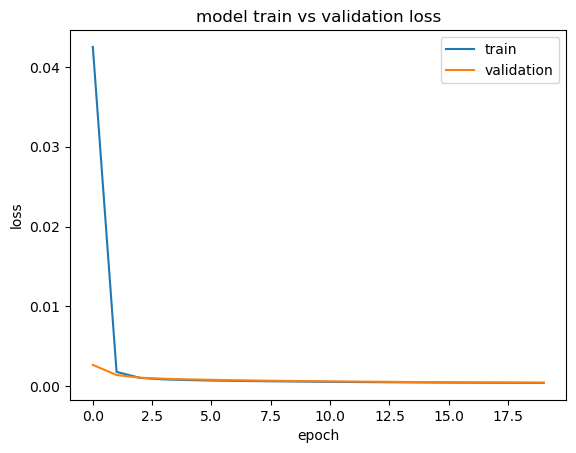

In [26]:
if DATA_DRIVEN_PREDICTION:
    if lstm:
        dd_model =  my_lstm_model(xTrain_data, xTest_data, yTrain_data, yTest_data)
    if gru:
        dd_model =  GRU_model(xTrain_data, xTest_data, yTrain_data, yTest_data)
    if mlp:
        dd_model =  MLP_model(xTrain_data, xTest_data, yTrain_data, yTest_data)


## 3.0 Prediction Testing


### 3.1 Generate Testset Data (For Data_Driven_Prediction)

In [27]:
if DATA_DRIVEN_PREDICTION:   
    recording_id_sel = ['2'] # Test ID for Data Driven Prediction
    data_sel_id = 0
    
    # Initialize data Grabber Object
    test_data_obj = dataGrabber(dataset_path)

    test_data_obj.recording_id = recording_id_sel
    test_data_obj.read_csv_with_recordingID()

    test_track_data = test_data_obj.get_tracks_data()
    test_track_meta_data = test_data_obj.get_tracksMeta_data()    

### 3.2 Preprocessing and Downsampling Data to Match Training Dataset (For Data_Driven_Prediction)

In [28]:
if DATA_DRIVEN_PREDICTION:   
    test_pre_process_obj = preProcess()
    test_pre_process_obj.tracks_data = test_track_data
    test_pre_process_obj.tracks_meta_data = test_track_meta_data
    test_pre_process_obj.recording_ids = test_data_obj.recording_id
    test_pre_process_obj.data_len = len(test_track_data)
    
    test_pre_process_obj.frames_skipped = 5
    test_track_data_downsampled, test_tracks_meta_data = test_pre_process_obj.get_down_sampled_data()
    test_pre_process_obj.tracks_data = test_track_data_downsampled

### 3.4 Data Normalization (For Data_Driven_Prediction)

In [29]:
if DATA_DRIVEN_PREDICTION:   
    # Gets the tracks data normalized
    test_tracks_data_norm, min_max_scalar_list = test_pre_process_obj.normalize_data()
     # Resetting dropped frames index
    test_tracks_data_norm = test_tracks_data_norm.reset_index(drop=True)
    
    # Saving Normalized Data
    test_data_prepare_obj = dataPrepare()
    test_data_prepare_obj.tracks_data_norm = test_tracks_data_norm
    test_data_prepare_obj.tracksMeta_data = test_tracks_meta_data
    test_data_prepare_obj.data_len = len(test_tracks_data_norm)

### 3.5 Data Stacking (For Data_Driven_Prediction)

In [30]:
if DATA_DRIVEN_PREDICTION:
    # Number for track id to be used
    test_data_prepare_obj.track_id_range = 10  
    
    # Gets the tracks data normalized and its ID
    test_data_prepare_obj.data_input = "normalized_data"
    t_norm_Ids, t_in_norm, t_out_norm = test_data_prepare_obj.data_stacking()
    # Predict the output
    n_input = np.shape(t_in_norm)[1] * np.shape(t_in_norm)[2]
    if mlp:
        t_in_norm_reshaped = np.reshape(t_in_norm, (np.shape(t_in_norm)[0], n_input))
    else:
        t_in_norm_reshaped = np.reshape(t_in_norm, (np.shape(t_in_norm)[0], 1, n_input))

This might take a while!
Current progress: 0.0 %
Current progress: 11.11 %
Current progress: 22.22 %
Current progress: 33.33 %
Current progress: 44.44 %
Current progress: 55.56 %
Current progress: 66.67 %
Current progress: 77.78 %
Current progress: 88.89 %
Current progress: 100.0 %
Done! 


##  4.0 Collect Ground Truth

In [31]:
sys.path.append('evaluation/')
from physics_based_pred_evaluator import physicsBasedEvaluation
from physics_based_pred_evaluator_ca import physicsBasedEvaluationCa

In [32]:
if PHYSICS_BASED_PREDICTION:
    test_track_data_sel = track_data_downsampled
    test_track_data_sel = test_track_data_sel.sort_values(["frame"], axis = 0, ascending = True)
    if bicycle == True :
        phy_eval_obj = physicsBasedEvaluation()
    else :
        phy_eval_obj = physicsBasedEvaluationCa()
    
    phy_eval_obj.selected_data = test_track_data_sel

     # Setting Other Parameters        
    phy_eval_obj.max_num_frames = int(test_track_data_sel.max()["frame"])
    phy_eval_obj.recording_id = recording_id_sel[0]
    
    phy_eval_obj.pred_horizon = 15
    phy_eval_obj.frame_range = 100
    
    # Should be same as what used during downsampling => 5
    phy_eval_obj.frames_skipped = pre_process_obj.frames_skipped 
    
    track_data_sampled = list()
    test_track_data_sel = test_track_data_sel.sort_values(["frame", "trackId"], axis = 0, ascending = True)

### 4.1 Get Ground Truth (For Physics_Based_Prediction)

In [33]:
if PHYSICS_BASED_PREDICTION:
    ground_truth, track_id_counter = phy_eval_obj.get_ground_truth()

### 4.2 Get Predicted Value (For Physics_Based_Prediction)

In [34]:
sys.path.append('prediction_models/bicycle_model/')
from bicycle_model import my_bicycle_model
new_sampling_rate = 0.2
if PHYSICS_BASED_PREDICTION:
    if ca:
        physics_model_prediction = my_constant_acc_model(test_track_data_sel, phy_eval_obj.pred_horizon, new_sampling_rate, phy_eval_obj.frame_range)
    if bicycle:
        physics_model_prediction = my_bicycle_model(test_track_data_sel, phy_eval_obj.pred_horizon, new_sampling_rate, phy_eval_obj.frame_range)


### 4.3 Storing Predicted Values and Ground Truth into the Evaluation (For Physics_Based_Prediction)

In [35]:
if PHYSICS_BASED_PREDICTION:
    phy_eval_obj.predicted_data = physics_model_prediction
    phy_eval_obj.ground_truth_data = ground_truth

### 4.4 Create Evaluation Workbook and Add Data (For Physics_Based_Prediction)

In [36]:
if PHYSICS_BASED_PREDICTION:
    work_book_filename = 'results/physics_prediction_result.xlsx'
elif DATA_DRIVEN_PREDICTION:
    work_book_filename = 'results/data_driven_prediction_result.xlsx'

### 4.5 Delete the File if Exists (For Physics_Based_Prediction)

In [37]:
if PHYSICS_BASED_PREDICTION:
    if os.path.exists(work_book_filename):
        os.remove(work_book_filename)

### 4.6 Write To Workbook (For Physics_Based_Prediction)

In [38]:
if PHYSICS_BASED_PREDICTION:
    phy_eval_obj.wb_filename = work_book_filename
    phy_eval_obj.write_to_workbook()

In [39]:
sys.path.append('evaluation/')
from data_driven_pred_evaluator import dataDrivenEvaluation

In [40]:
if DATA_DRIVEN_PREDICTION: 
    data_eval_obj = dataDrivenEvaluation()    

### 4.7 Get Ground Truth Data Preparation (For Data_Driven_Prediction)

In [41]:
if DATA_DRIVEN_PREDICTION:
    # Resetting dropped frames index
    test_track_data_downsampled = test_track_data_downsampled.reset_index(drop=True)
    ground_truth_prepare_obj = dataPrepare()
    ground_truth_prepare_obj.data_input = "raw_data"
    ground_truth_prepare_obj.track_id_range = 10
    ground_truth_prepare_obj.tracksMeta_data = test_tracks_meta_data
    ground_truth_prepare_obj.tracks_data_norm = test_tracks_data_norm
    ground_truth_prepare_obj.tracks_data = test_track_data_downsampled
    ground_truth_prepare_obj.data_len = len(test_track_data_downsampled) 
    #ground_truth_prepare_obj.num_predict = 15
    t_raw_Ids, t_in_raw, t_out_raw = ground_truth_prepare_obj.data_stacking()

This might take a while!
Current progress: 0.0 %
Current progress: 11.11 %
Current progress: 22.22 %
Current progress: 33.33 %
Current progress: 44.44 %
Current progress: 55.56 %
Current progress: 66.67 %
Current progress: 77.78 %
Current progress: 88.89 %
Current progress: 100.0 %
Done! 


### 4.8 Copy ground truth data to data driven evaluator (For Data_Driven_Prediction)

In [42]:
if DATA_DRIVEN_PREDICTION:
    data_eval_obj.t_raw_Ids = t_raw_Ids
    data_eval_obj.t_in_raw = t_in_raw
    data_eval_obj.t_out_raw = t_out_raw

### 4.9 Get Ground Truth (For Data_Driven_Prediction)

In [43]:
if DATA_DRIVEN_PREDICTION:
    xCenter_gt, yCenter_gt, heading_gt = data_eval_obj.get_ground_truth()

 ### 4.10 Get Predicted Value (For Data_Driven_Prediction)

In [44]:
if DATA_DRIVEN_PREDICTION:
    yhat = dd_model.predict(t_in_norm_reshaped, verbose=0)
    
    # Save Predicted Data into the Evaluator
    data_eval_obj.y_hat = yhat

In [45]:
if DATA_DRIVEN_PREDICTION:
    # Set Paramters
    data_eval_obj.min_max_scalar_list = min_max_scalar_list
    
    # Get Prediction
    xCenter_prediction, yCenter_prediction, heading_prediction = data_eval_obj.get_prediction()

### 4.11 Delete the File if Exists (For Data_Driven_Prediction)

In [46]:
if DATA_DRIVEN_PREDICTION:
    if os.path.exists(work_book_filename):
        os.remove(work_book_filename)

### 4.12 Write To Workbook (Excel-Sheet) (For Data_Driven_Prediction)

In [47]:
if DATA_DRIVEN_PREDICTION:
    data_eval_obj.wb_filename = work_book_filename
    data_eval_obj.write_to_workbook()

## 5.0 Evaluation


### 5.1 Importing the evaluation matrix

In [48]:
from evaluation_matrix import evaluationMatrix
from evaluation_matrix_ca import evaluationMatrixCa

In [49]:
if PHYSICS_BASED_PREDICTION:
    if bicycle == True:
        eval_obj = evaluationMatrix(work_book_filename, phy_eval_obj.pred_horizon)
    else:
        eval_obj = evaluationMatrixCa(work_book_filename, phy_eval_obj.pred_horizon)
elif DATA_DRIVEN_PREDICTION:
    eval_obj = evaluationMatrix(work_book_filename, data_eval_obj.n_predict)

### 5.2 Calculating Error values

In [50]:
eval_obj.get_result()

The average displacement error is 1.883 m
The average final displacement error is 2.474 m
The average absolute heading error is 8.13 degrees


(1.882582152212062, 2.4735281733392123, 8.125278065311877)